# Linear Regression 구현 해보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(777)

---
# 1. 가상 데이터셋

In [23]:
W_true = 3.0
B_true = 2.0

X = tf.random.normal((500, 1))
noise = tf.random.normal((500, 1))

y = X * W_true + B_true + noise

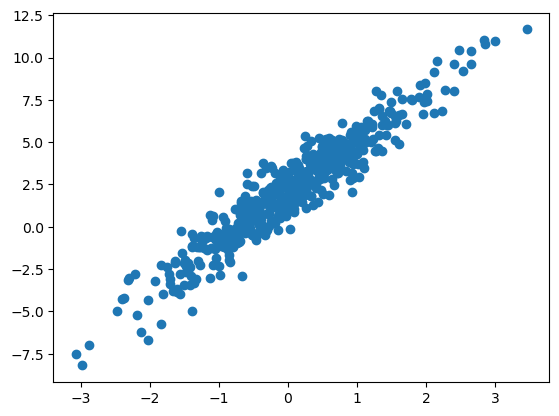

In [24]:
plt.scatter(X, y)
plt.show()

In [25]:
# 학습
w = tf.Variable(5.0)
b = tf.Variable(0.0)
lr = 0.03   # learning rate

In [26]:
w_rec = []
b_rec = []
loss_rec = []

for epoch in range(100):
    with tf.GradientTape() as tape:   # 매 epoch 마다 1번씩 학습
        y_hat = X * w + b
        loss = tf.reduce_mean(tf.square(y - y_hat))  # MSE
        
    w_rec.append(w.numpy())   
    b_rec.append(b.numpy())
    loss_rec.append(loss.numpy())
        
    dw, db = tape.gradient(loss, [w, b])
    
    w.assign(w - lr*dw)   # w.assign_sub(lr*dw) 와 동일
    b.assign(b - lr*db)   # w.assign_sub(lr*db) 와 동일

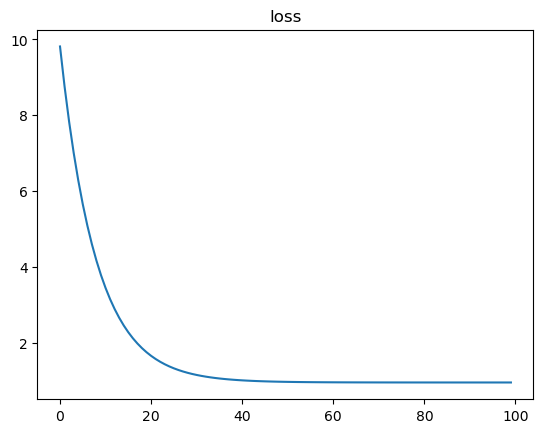

In [27]:
plt.plot(loss_rec)
plt.title("loss")
plt.show()

- loss 가 점점 줄어든다

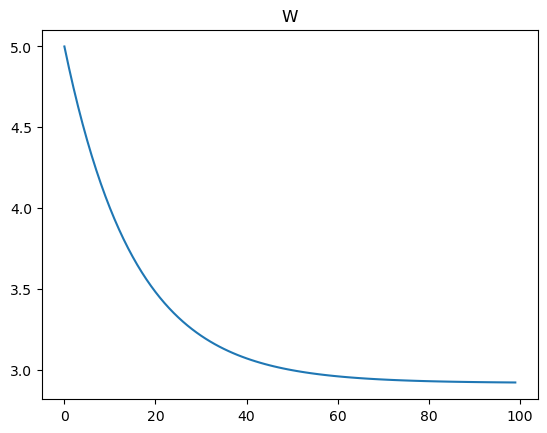

In [28]:
plt.plot(w_rec)
plt.title("W")
plt.show()

- W_true 값인 3에 가까워진다.

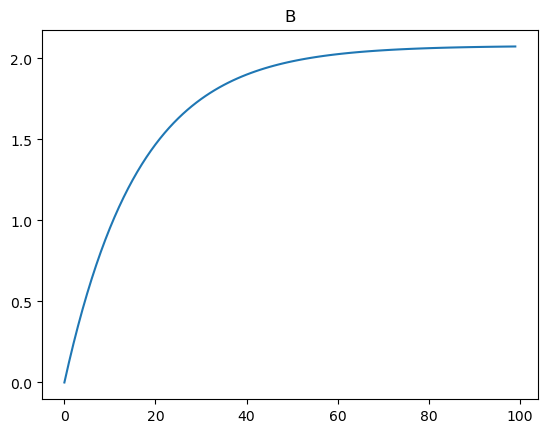

In [29]:
plt.plot(b_rec)
plt.title("B")
plt.show()

- B_true값인 2에 가까워진다,

---
# 2. Dataset 당뇨병 진행도 예측하기

In [36]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [37]:
diabets = load_diabetes()
df = pd.DataFrame(diabets.data, columns=diabets.feature_names, dtype=np.float32)
df['const'] = np.ones(df.shape[0])  # bias 대신 const 컬럼 사용
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,1.0


### 1)

$X$ 를 Feature, ,$w$를 가중치 벡터, $y$를 Target이라 하자. 

$X^T X$의 역행렬이 존재 한다고 가정했을 때,  

아래의 식을 이용해 $w$의 추정치 $w^*$를 구해봅시다. 

$$
w^{\ast} = (X^TX)^{-1} X^T y
$$


In [40]:
X = df
y = np.expand_dims(diabets.target, axis=1)

In [41]:
XT = tf.transpose(X)

w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

In [42]:
y_pred = tf.matmul(X, w)

In [43]:
print("예측한 진행도 :", y_pred[0].numpy(),  "실제 진행도 :", diabets.target[0])
print("예측한 진행도 :", y_pred[19].numpy(), "실제 진행도 :", diabets.target[19])
print("예측한 진행도 :", y_pred[31].numpy(), "실제 진행도 :", diabets.target[31])

예측한 진행도 : [206.11667747] 실제 진행도 : 151.0
예측한 진행도 : [124.01754101] 실제 진행도 : 168.0
예측한 진행도 : [69.47575835] 실제 진행도 : 59.0


### 2) SGD 방식으로 구현 

##### **Conditions**
- steepest gradient descents(전체 데이터 사용)
- 가중치는 Gaussian normal distribution에서의 난수로 초기화함. 
- step size  == 0.03
- 100 iteration

In [44]:
lr = 0.03
num_iter = 100

In [51]:
w = tf.Variable(tf.random.normal((X.shape[-1], 1), dtype=tf.float64))  # 가중치는 Gaussian normal distribution에서의 난수로 초기화

for i in range(num_iter):
    with tf.GradientTape() as tape:
        y_hat = tf.matmul(X, w)
        loss = tf.reduce_mean((y - y_hat)**2)
        
    dw = tape.gradient(loss, w)
    
    w.assign_sub(lr * dw)

In [52]:
print("예측한 진행도 :", y_hat[0].numpy(),  "실제 진행도 :", diabets.target[0])
print("예측한 진행도 :", y_hat[19].numpy(), "실제 진행도 :", diabets.target[19])
print("예측한 진행도 :", y_hat[31].numpy(), "실제 진행도 :", diabets.target[31])

예측한 진행도 : [152.98917278] 실제 진행도 : 151.0
예측한 진행도 : [149.74311123] 실제 진행도 : 168.0
예측한 진행도 : [147.6517307] 실제 진행도 : 59.0
